# Introduction to TF2.4_IVIM-MRI_CodeCollection github and IVIM Analysis using Python

# Installation

First, download the TF2.4_IVIM-MRI_CodeCollection github as zip-folder by clicking on Code > Download ZIP:

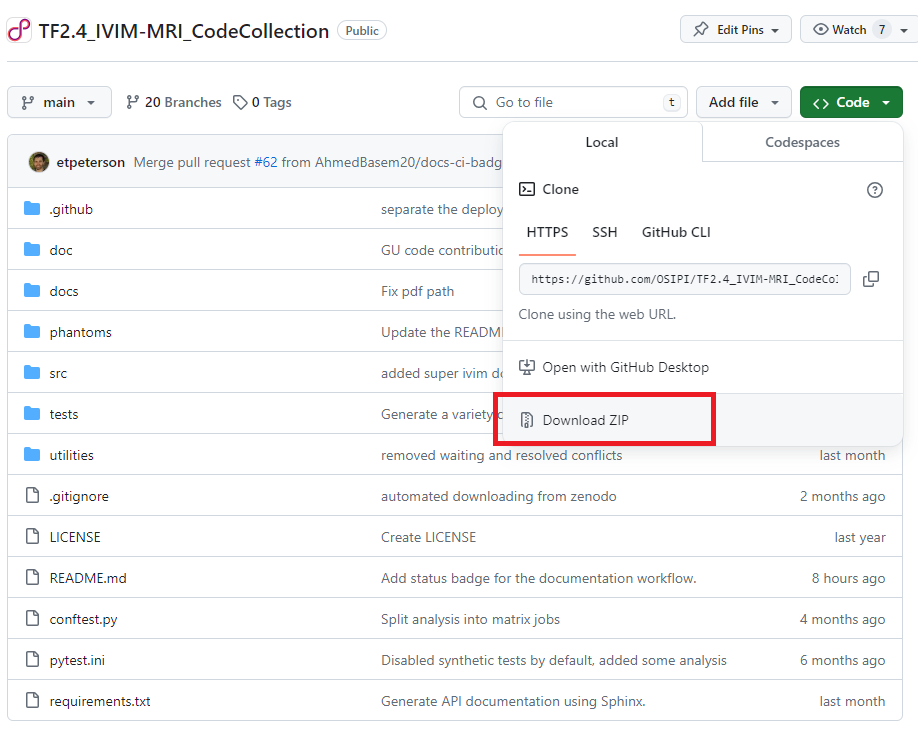

If you haven't done so already, install Anaconda for your pc environment: https://www.anaconda.com/download 

Open Anaconda and install Jupyter Notebook. Once this is installed, you can launch Jupyter Notebook and navigate to this notebook in your local download of the github repository.

Run the cells by clicking on 'Run'-> 'Run selected cell'
If you see [*] in front of the cell, this means its running. 

## Install and import necessary libraries

If you have not used python before, we need to ensure that you have downloaded the required packages. 
Open anaconda prompt and install the required packages:

In [1]:
# install packages through anaconda prompt
pip3 install numpy
pip3 install matplotlib
pip3 install scipy
pip3 install nibabel

SyntaxError: invalid syntax (882689640.py, line 2)

Once all the packages are installed, you need to import them:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
sys.path.insert(0, '..')
from utilities.data_simulation.Download_data import download_data
import nibabel
import os

# Loading Data

Due to the large data size, we stored example data elsewhere: https://zenodo.org/records/10696605

Make sure you have enough space on your computer to store the data!

In [4]:
# Download the data. 
download_data()

Folder 'download' created.


If you have problems downloading the data. You can also download it directly from the zenodo link above, and paste the 'Data' folder into the 'download' folder within your 'TF2.4_IVIM-MRI_CodeCollection' folder.

In [3]:
# Load the data.

# load and init b-values
bvec = np.genfromtxt('../download/Data/brain.bvec')
bval = np.genfromtxt('../download/Data/brain.bval')

#load nifti
data = nibabel.load('../download/Data/brain.nii.gz')
datas = data.get_fdata() 


Now your downloaded data is ready, and you can apply the code within the repository

# Data Preprocessing for one voxel
We will demonstrate an IVIM data analysis pipeline by showing the analysis of one voxel.
First, we need to pick one voxel in tissue containing the signal as function of b-values. We will start by plotting the signal of this voxel at b=0.


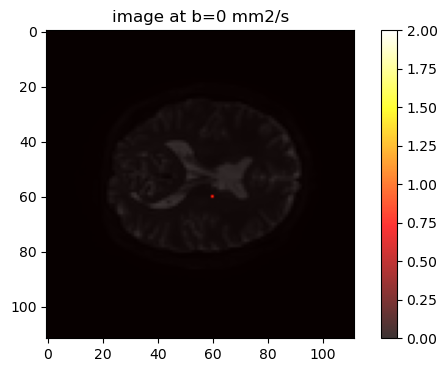

In [4]:
#choose a voxel
x=60
y=60
z=30
sx, sy, sz, n_bval = datas.shape 

#plot example of b=0 image with the voxel that we chose
voxelmask=np.zeros([sx,sy])
voxelmask[x,y]=1
fig = plt.figure(figsize=(7, 4))
plt.imshow(np.squeeze(datas[:,:,z,0]), cmap='gray')
plt.imshow(np.squeeze(voxelmask), vmin=0, vmax=2, cmap='hot', alpha=.8)
plt.title('image at b=0 mm2/s')
plt.colorbar()

The plot shows the signal of the selected voxel at b=0. Now, we need to normalize the data:

Text(0.5, 1.0, 'normalized signal as function of b-value')

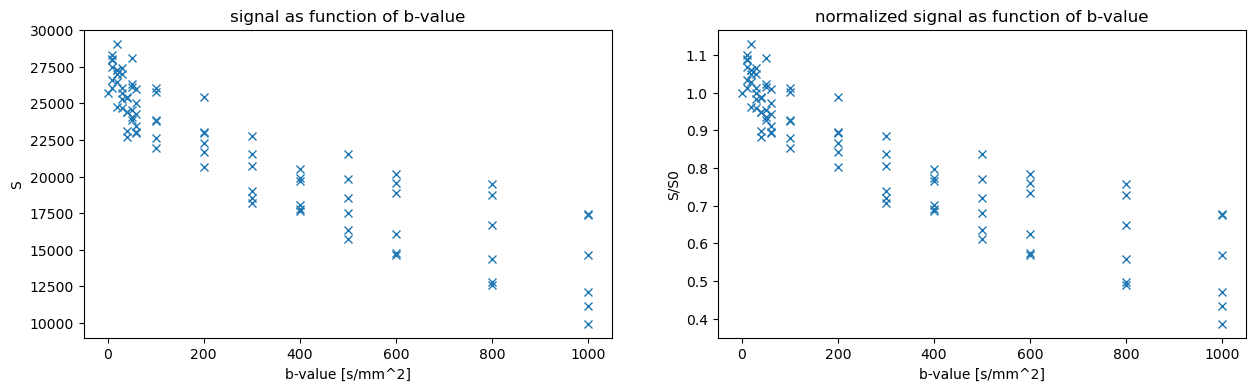

In [5]:
# Plot example signal as function of b-values without normalization
data_vox=np.squeeze(datas[x,y,z,:])
fig = plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(bval,data_vox,'x')
plt.xlabel('b-value [s/mm^2]')
plt.ylabel('S')
plt.title('signal as function of b-value')

# normalise data
selsb = np.array(bval) == 0
S0 = np.nanmean(data_vox[selsb], axis=0).astype('<f')
data_vox = data_vox / S0


# Plot example signal as function of b-values with normalization
plt.subplot(122)
plt.plot(bval,data_vox,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('normalized signal as function of b-value')


The plot on the right shows the signal from the one voxel for each b-value (x-axis). The data is plotted for multiple directions, thats why there are multiple data points per b-value. The plot on the left shows the normalized signal from our voxel.

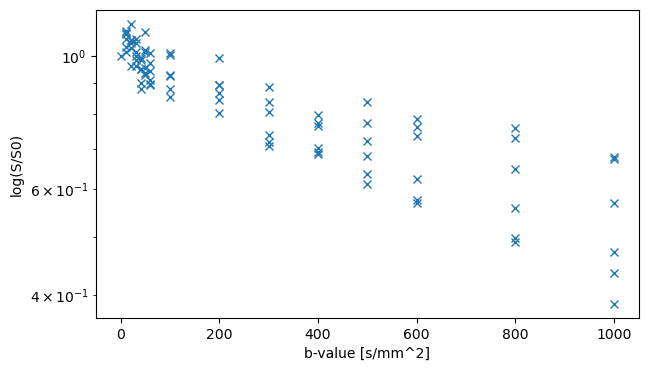

In [6]:
# Plot log(signal) as function of b-values 
fig = plt.figure(figsize=(7, 4))
plt.plot(bval,data_vox,'x')
plt.ylabel('log(S/S0)')
plt.xlabel('b-value [s/mm^2]')
plt.yscale("log")

This plot shows the log(signal) from our one voxel as a function of b-values.

We will now plot the signal of this voxel for each direction independently.

Text(0.5, 1.0, 'direction 6')

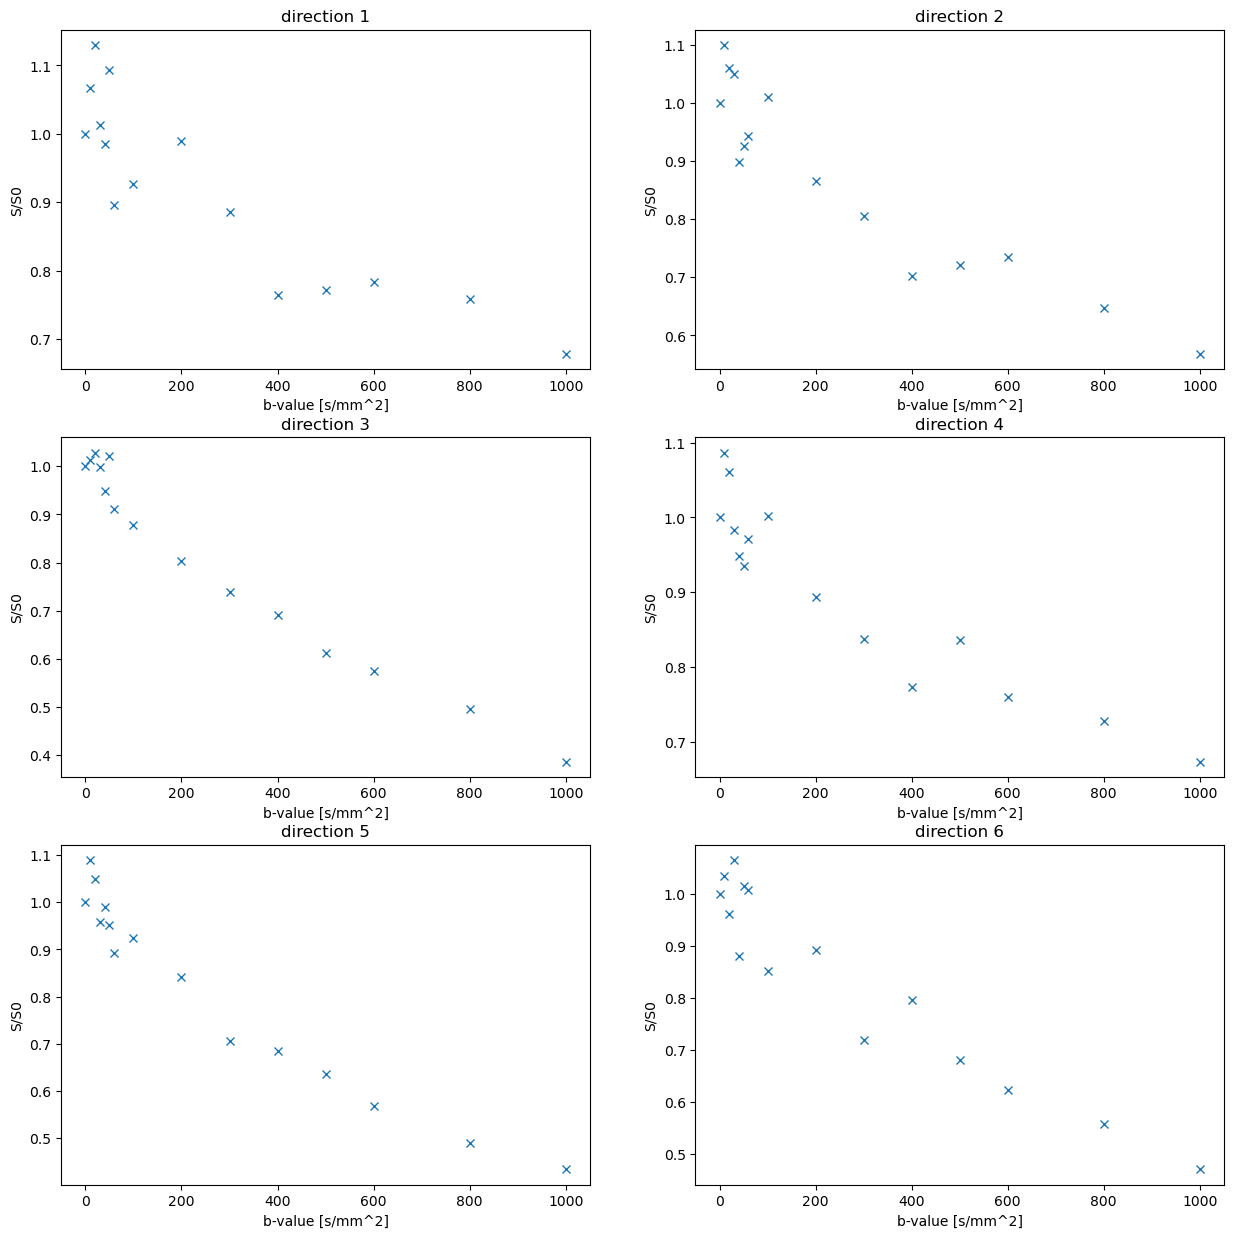

In [7]:
# Plot signal as function of b-values for only 1 direction
fig = plt.figure(figsize=(15, 15))
plt.subplot(321)
direction = 1 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(322)
direction = 2 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(323)
direction = 3 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(324)
direction = 4 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(325)
direction = 5 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(326)
direction = 6 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

# IVIM Analysis: choose an algorithm

For the IVIM analysis, you can choose specific code from the repository. First check if you have installed the required packages. Otherwise, install these through the anaconda prompt:


In [ ]:
# install packages through anaconda prompt
pip3 install tqdm
pip3 install dipy
pip3 install joblib

Code submissions are located in the src/original folder, where submissions are named as `<initials>_<institution>`
The src/standardized folder contains the standardised version of each code submission. Here, a class is created following a naming convention (`<initials>_<institution>_<algorithm name>`), with `__init__()` and `ivim_fit()` methods that integrate well with the OsipiBase class

## The `OsipiBase` class
The usage of the OsipiBase class mainly consists of running the osipi_fit() method. In this method, the inputs from `__init__()` of the standardised version of a code submission, and the signals and b-values input to `osipi_fit()` is processed and fed into the `ivim_fit()` function.


In [8]:
from src.wrappers.ivim_fit import ivim_fit
from src.wrappers.OsipiBase import OsipiBase

In the folder TF2.4_IVIM-MRI_CodeCollection/src/standardized/ you can see all the algorithms that have been uploaded and standardized. 

In [9]:
currentdir = os.path.dirname(os.getcwd())
os.listdir('{}\\src/standardized'.format(currentdir))


['ETP_SRI_LinearFitting.py',
 'IAR_LU_biexp.py',
 'IAR_LU_modified_mix.py',
 'IAR_LU_modified_topopro.py',
 'IAR_LU_segmented_2step.py',
 'IAR_LU_segmented_3step.py',
 'IAR_LU_subtracted.py',
 'OGC_AmsterdamUMC_Bayesian_biexp.py',
 'OGC_AmsterdamUMC_biexp.py',
 'OGC_AmsterdamUMC_biexp_segmented.py',
 'OJ_GU_seg.py',
 'PvH_KB_NKI_IVIMfit.py',
 'PV_MUMC_biexp.py',
 '__init__.py',
 '__pycache__']

Choose one of these algorithms, for example: 'IAR_LU_biexp' or 'OGC_AmsterdamUMC_Bayesian_biexp', and import it:

In [10]:
from src.standardized.IAR_LU_biexp import IAR_LU_biexp
from src.standardized.OGC_AmsterdamUMC_Bayesian_biexp import OGC_AmsterdamUMC_Bayesian_biexp

c:\Users\ivan5\Box\OSIPI\TF2.4_IVIM-MRI_CodeCollection\doc\..\src\standardized\OGC_AmsterdamUMC_Bayesian_biexp.py:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(prior_in) is 4:


In [11]:
algorithm1=IAR_LU_biexp()
algorithm2=OGC_AmsterdamUMC_Bayesian_biexp()

In [12]:
#apply algorithm 1 to the diffusion data in 1 direction to obtain f, D* and D
OsipiBase.osipi_fit(algorithm1,signal_1dir, np.unique(bval))


100%|██████████| 1/1.0 [00:00<00:00, 62.98it/s]


{'f': array(0.04609779), 'D*': array(0.01136011), 'D': array(0.00071134)}

The values displayed above are the estimated f, D* and D values by algorithm 1.

In [13]:
#apply algorithm 2 to the diffusion data in 1 direction to obtain f, D* and D
OsipiBase.osipi_fit(algorithm2,signal_1dir, np.unique(bval)) 

100%|██████████| 1/1.0 [00:00<00:00, 55.56it/s]


{'f': array(0.04611801), 'D*': array(0.0113541), 'D': array(0.0007113)}

The values displayed above are the estimated f, D* and D values by algorithm 2.

You can already see that the different algorithm give slightly different estimates for f, D* and D. Now let's visualize the model fits:

100%|██████████| 1/1.0 [00:00<00:00, 167.24it/s]
100%|██████████| 1/1.0 [00:00<00:00, 82.84it/s]


Text(0.5, 1.0, 'algorithm 2')

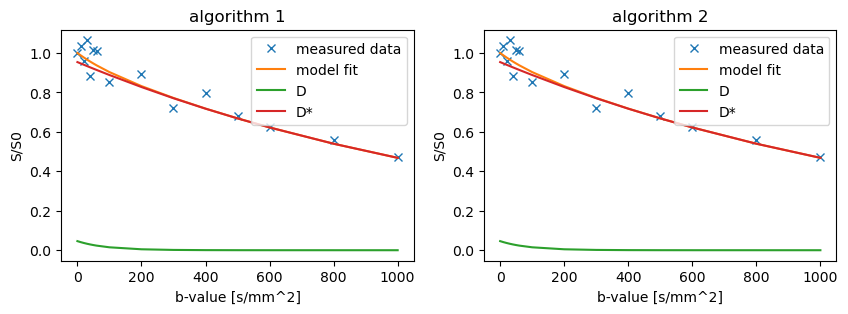

In [14]:
fig = plt.figure(figsize=(10, 3))

#apply algorithm 1 to the diffusion data in 1 direction to obtain f, D* and D
fit = OsipiBase.osipi_fit(algorithm1,signal_1dir, np.unique(bval)) # Dictionary with f, D*, D"

#plot the results of algorithm 1
plt.subplot(121)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.plot(np.unique(bval),fit['f']*np.exp(-np.unique(bval)*fit['D*'])+(1-fit['f'])*np.exp(-np.unique(bval)*fit['D']))
plt.plot(np.unique(bval),fit['f']*np.exp(-np.unique(bval)*fit['D*']))
plt.plot(np.unique(bval),(1-fit['f'])*np.exp(-np.unique(bval)*fit['D']))
plt.legend(['measured data','model fit','D','D*'])
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('algorithm 1')
          
#apply algorithm 2 to the diffusion data in 1 direction to obtain f, D* and D
fit = OsipiBase.osipi_fit(algorithm2,signal_1dir, np.unique(bval)) # Dictionary with f, D*, D"

#plot the results of algorithm 2
plt.subplot(122)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.plot(np.unique(bval),fit['f']*np.exp(-np.unique(bval)*fit['D*'])+(1-fit['f'])*np.exp(-np.unique(bval)*fit['D']))
plt.plot(np.unique(bval),fit['f']*np.exp(-np.unique(bval)*fit['D*']))
plt.plot(np.unique(bval),(1-fit['f'])*np.exp(-np.unique(bval)*fit['D']))
plt.legend(['measured data','model fit','D','D*'])
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('algorithm 2')


These results are for one voxel, but this can also be done for multiple voxels.

## Perform IVIM model fitting for all voxels within a slice



In [16]:
np.unique(bval)

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,  100.,  200.,
        300.,  400.,  500.,  600.,  800., 1000.])

These are the b-values.

We will now fit the data of one slice in a chosen direction. 
To fit the data in a certain direction, adapt direction = .. to the direction that you would like to fit.

In [17]:
#pick a slice
slice_data=np.squeeze(datas[:,:,30,:])
#fit the IVIM model for 1 direction
direction = 6 #choose: 1, 2, 3, 4, 5, or 6
slice_data_1dir=slice_data[:,:,direction:None:6] #pick the signal with the same bvec
slice_data_1dir=np.insert(slice_data_1dir, 0 , slice_data[:,:,0], axis=2) #add S0
#reshape data for fitting
sx, sy, n_bval = slice_data_1dir.shape 
X_dw = np.reshape(slice_data_1dir, (sx * sy, n_bval))
#select only relevant values, delete background and noise, and normalise data
selsb = np.array(np.unique(bval)) == 0
S0 = np.nanmean(X_dw[:, selsb], axis=1)
S0[S0 != S0] = 0
S0=np.squeeze(S0)
valid_id = (S0 > (0.5 * np.median(S0[S0 > 0]))) 
slice_data_norm = X_dw[valid_id, :]

In [55]:
##pick a slice SECOND VERSION INCLUDES ALL DIRECTIONS IN 1 FIT
#slice_data=np.squeeze(datas[:,:,30,:])
##reshape data for fitting
#sx, sy, n_bval = slice_data.shape 
#X_dw = np.reshape(slice_data, (sx * sy, n_bval))
##select only relevant values, delete background and noise, and normalise data
#selsb = np.array(bval) == 0
#S0 = np.nanmean(X_dw[:, selsb], axis=1)
#S0[S0 != S0] = 0
#S0=np.squeeze(S0)
#valid_id = (S0 > (0.5 * np.median(S0[S0 > 0]))) 
#slice_data_norm = X_dw[valid_id, :]

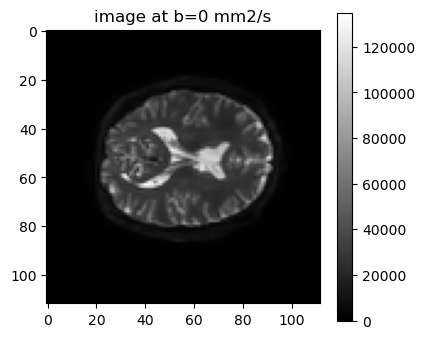

In [18]:
#plot example of b=0 image
fig = plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.imshow(np.squeeze(slice_data[:,:,0]), cmap='gray')
plt.title('image at b=0 mm2/s')
plt.colorbar()

This plot shows the b=0 image, thus the b=0 if the selected slice.

In [20]:
#apply algorithm 2 to the diffusion data to obtain f, D* and D for each voxel in the slice (1 direction)
OsipiBase.osipi_fit(algorithm2,slice_data_norm,bval)

#Algorithm 2 does not seem to give accurate fit paramters using osipi_fit 2D data

100%|██████████| 4274/4274 [00:00<00:00, 4809.15it/s]


{'f': array([0., 0., 0., ..., 0., 0., 0.]),
 'D*': array([0., 0., 0., ..., 0., 0., 0.]),
 'D': array([0., 0., 0., ..., 0., 0., 0.])}

In [21]:
#apply algorithm 1 to the diffusion data to obtain f, D* and D for each voxel in the slice
maps = OsipiBase.osipi_fit(algorithm1,slice_data_norm,np.unique(bval))


100%|██████████| 4274/4274 [00:11<00:00, 374.05it/s]


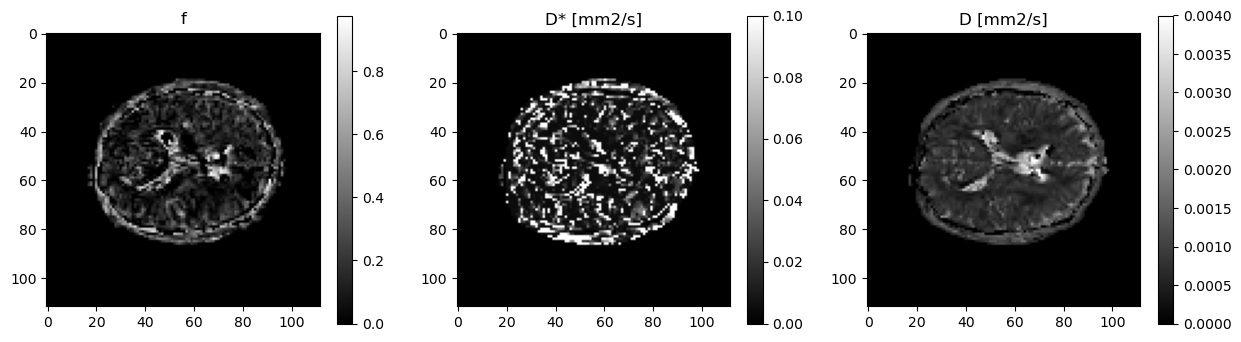

In [29]:
f_array=maps["f"]
Dstar_array=maps["D*"]
D_array=maps["D"]

f_map = np.zeros([sx * sy])
f_map[valid_id] = f_array[0:sum(valid_id)]
f_map = np.reshape(f_map, [sx, sy])

Dstar_map = np.zeros([sx * sy])
Dstar_map[valid_id] = Dstar_array[0:sum(valid_id)]
Dstar_map = np.reshape(Dstar_map, [sx, sy])

D_map = np.zeros([sx * sy])
D_map[valid_id] = D_array[0:sum(valid_id)]
D_map = np.reshape(D_map, [sx, sy])

#plot example of IVIM parameters maps
fig = plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.imshow(np.squeeze(f_map[:,:]), cmap='gray')
plt.title('f')
plt.colorbar()

plt.subplot(132)
plt.imshow(np.squeeze(Dstar_map[:,:]), cmap='gray')
plt.title('D* [mm2/s]')
plt.colorbar()

plt.subplot(133)
plt.imshow(np.squeeze(D_map[:,:]), cmap='gray')
plt.title('D [mm2/s]')
plt.colorbar()

These maps show the estimated f, D* and D values in the selected slice, estimated by algorithm 1.

These results are in 2D, now we will fit on 3D data ans save the results.

### Apply the fit to 3D image and save the IVIM parameter maps

Like the 2D data, we will fit the 3D data from a chosen acquired diffusion-sensitizing direction. 
To fit the data in a certain direction, adapt direction = .. to the direction that you would like to fit.

In [30]:
#fit the IVIM model for 1 direction
direction = 6 #choose: 1, 2, 3, 4, 5, or 6
data_1dir=datas[:,:,:,direction:None:6] #pick the signal with the same bvec
data_1dir=np.insert(data_1dir, 0 , datas[:,:,:,0], axis=3) #add S0
#reshape data for fitting
sx, sy, sz, n_bval = data_1dir.shape 
X_dw = np.reshape(data_1dir, (sx * sy * sz, n_bval))
#select only relevant values, delete background and noise, and normalise data
selsb = np.array(np.unique(bval)) == 0
S0 = np.nanmean(X_dw[:, selsb], axis=1)
S0[S0 != S0] = 0
S0=np.squeeze(S0)
valid_id = (S0 > (0.5 * np.median(S0[S0 > 0]))) 
data_norm = X_dw[valid_id, :]
data_norm.shape

(229120, 15)

After reshaping and preprocessing the data (previous step), we will now apply a fitting algorithm to the 3D data to estimate the 3D parameter maps. This can take a while.

In [31]:
#apply algorithm 1 to the diffusion data to obtain f, D* and D for each voxel in the slice
maps = OsipiBase.osipi_fit(algorithm1,data_norm,np.unique(bval))

f_array=maps["f"]
Dstar_array=maps["D*"]
D_array=maps["D"]

f_map = np.zeros([sx * sy * sz])
f_map[valid_id] = f_array[0:sum(valid_id)]
f_map = np.reshape(f_map, [sx, sy, sz])

Dstar_map = np.zeros([sx * sy * sz])
Dstar_map[valid_id] = Dstar_array[0:sum(valid_id)]
Dstar_map = np.reshape(Dstar_map, [sx, sy, sz])

D_map = np.zeros([sx * sy * sz])
D_map[valid_id] = D_array[0:sum(valid_id)]
D_map = np.reshape(D_map, [sx, sy, sz])

100%|██████████| 229120/229120 [13:34<00:00, 281.35it/s]


You can save the estimated parameter maps on your local computer. These will be saved in your 'TF2.4_IVIM-MRI_CodeCollection' folder in download/Data.

In [32]:
# save these volumes as nii.gz files
savedir=('../download/Data')
nibabel.save(nibabel.Nifti1Image(f_map, data.affine, data.header),'{folder}/f.nii.gz'.format(folder = savedir))
nibabel.save(nibabel.Nifti1Image(Dstar_map, data.affine, data.header),'{folder}/Dstar.nii.gz'.format(folder = savedir))
nibabel.save(nibabel.Nifti1Image(D_map, data.affine, data.header),'{folder}/D.nii.gz'.format(folder = savedir))

## Apply to your own data

This notebook shows you how to apply code from the repository to the example data from our zenodo. You can apply the code to your own data in two ways: 

-By providing your own data in the Data folder instead of the zenodo data, the you can just run and adapt this notebook.
-By creating your own script to use the repository's code, based on the code in this notebook.

If anything is unclear, we are always happy to help you out!